Case Study 2: How Can a Wellness Technology Company Play It Smart?
Case Study for Google Analytics Certificate

Business Task
Goals of the Case Study is to gain insights from smart device fitness data (non Bellabeat) to help guide marketing strategies for the company. What are some trends in smart device usage? How these trends apply to bellabeat customers? How could these trends help influence bellabeat marketing strategy?

Client/Sponsor: Bellabelt is a high-tech manufacturer of health focus products for women.
Data Sources
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

In [8]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8) #adjests configuration of the plot we will create 


In [15]:
dailyActivity = pd.read_csv('C:\pythoncode\EDA Python\dailyActivity_merged.csv')
weightLogInfo = pd.read_csv('C:\pythoncode\EDA Python\weightLogInfo_merged.csv')
sleepDay = pd.read_csv('C:\pythoncode\EDA Python\sleepDay_merged.csv')

In [16]:
dailyActivity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


In [17]:
dailyActivity.shape

(940, 15)

In [10]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [18]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
# count distinct value of "Id"
unique_id = len(pd.unique(dailyActivity["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 33


In [19]:
sleepDay.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407


In [9]:
sleepDay.shape 

(413, 5)

In [20]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [11]:
# count distinct value of "Id"
unique_id = len(pd.unique(sleepDay["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 24


In [21]:
weightLogInfo.head(2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.65,True,1462319999000


In [22]:
weightLogInfo.shape

(67, 8)

In [23]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [24]:
weightLogInfo.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [25]:
# count distinct value of "Id"
unique_id = len(pd.unique(weightLogInfo["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 8


In [12]:
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [13]:
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [26]:
weightLogInfo.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [27]:
# Creating dataframe 'Person_Activity' group by 'Id'
Person_Activity = dailyActivity.groupby('Id')
Person_Activity

In [28]:
#considering the mean value for each Id
summary_person = Person_Activity.mean()

In [29]:
summary_person.head(5)

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452


In [32]:
summary_person.corr() 

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,0.984910,0.983709,0.206688,0.784653,0.492113,0.723954,-0.005840,0.701375,0.477993,0.510720,-0.385462,0.436043
TotalDistance,0.984910,1.000000,0.999623,0.200794,0.819969,0.445104,0.718516,0.003507,0.727350,0.436456,0.452237,-0.320322,0.546320
TrackerDistance,0.983709,0.999623,1.000000,0.177095,0.821134,0.444927,0.715890,0.003651,0.728405,0.436919,0.447930,-0.321925,0.546944
LoggedActivitiesDistance,0.206688,0.200794,0.177095,1.000000,0.130729,0.064729,0.216689,-0.052245,0.208992,0.030296,0.155771,-0.094246,0.233396
VeryActiveDistance,0.784653,0.819969,0.821134,0.130729,1.000000,0.164020,0.247919,-0.049317,0.889206,0.221617,0.027590,-0.041633,0.511619
ModeratelyActiveDistance,0.492113,0.445104,0.444927,0.064729,0.164020,1.000000,0.262651,-0.187685,0.180976,0.958013,0.115434,-0.398248,0.061979
LightActiveDistance,0.723954,0.718516,0.715890,0.216689,0.247919,0.262651,1.000000,0.170727,0.209328,0.186806,0.833552,-0.446362,0.351100
SedentaryActiveDistance,-0.005840,0.003507,0.003651,-0.052245,-0.049317,-0.187685,0.170727,1.000000,-0.105117,-0.217480,0.289467,0.230947,-0.026325
VeryActiveMinutes,0.701375,0.727350,0.728405,0.208992,0.889206,0.180976,0.209328,-0.105117,1.000000,0.313146,0.003219,-0.202916,0.629966
FairlyActiveMinutes,0.477993,0.436456,0.436919,0.030296,0.221617,0.958013,0.186806,-0.217480,0.313146,1.000000,0.030151,-0.385756,0.157680


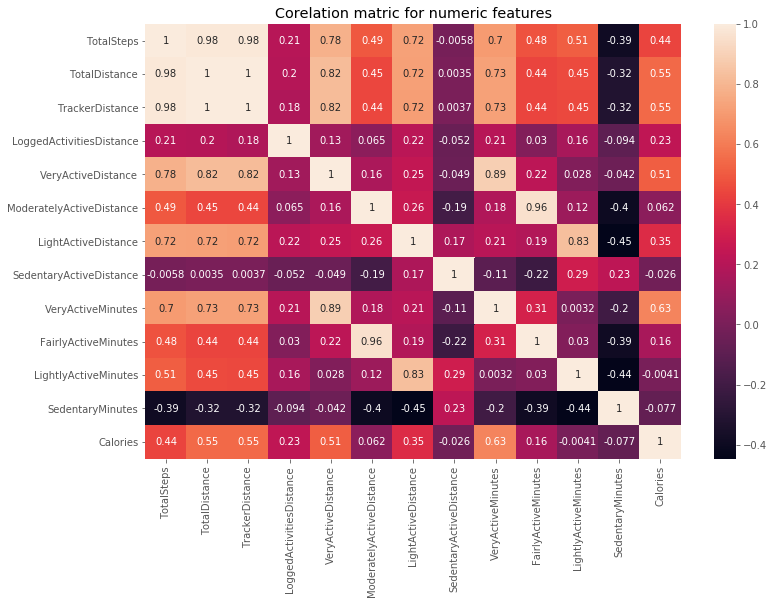

In [33]:
corelation_metrix = summary_person.corr() # bydefault(method ='pearson')
sns.heatmap(corelation_metrix, annot=True)
plt.title('Corelation matric for numeric features')
plt.show()

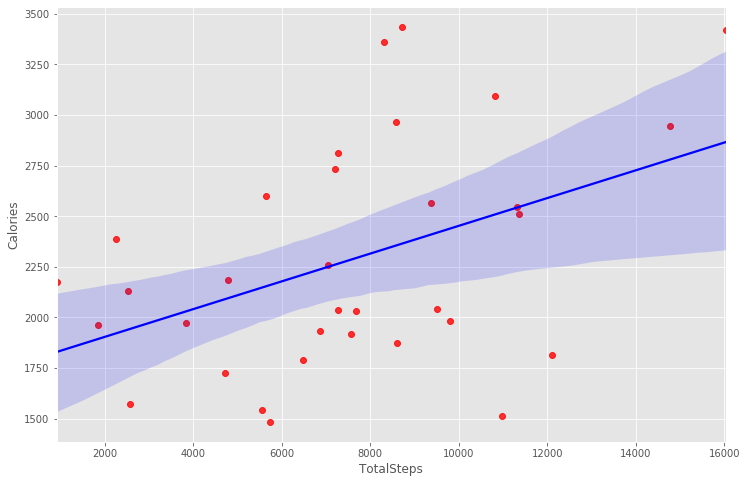

In [20]:
sns.regplot(x='TotalSteps', y='Calories',data=summary_person, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [43]:
# Creating dataframe 'Person_Sleep' group by 'Id'
Person_Sleep = sleepDay.groupby('Id')
Person_Sleep

In [44]:
summary_sleep = Person_Sleep.mean()

In [45]:
#combining summary_person and Summary_sleep
Merged_df = pd.merge(summary_person,summary_sleep, on=['Id'], how ='left')
Merged_df.head(3)

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,,,,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355,1.08,360.28,383.2
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839,NaN,NaN,NaN
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000,1.00,294.00,346.0


In [54]:
Merged_df.shape

(33, 17)

In [53]:
Merged_df.isnull().sum()

TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           9
TotalMinutesAsleep          9
TotalTimeInBed              9
TotalMinutes                0
dtype: int64

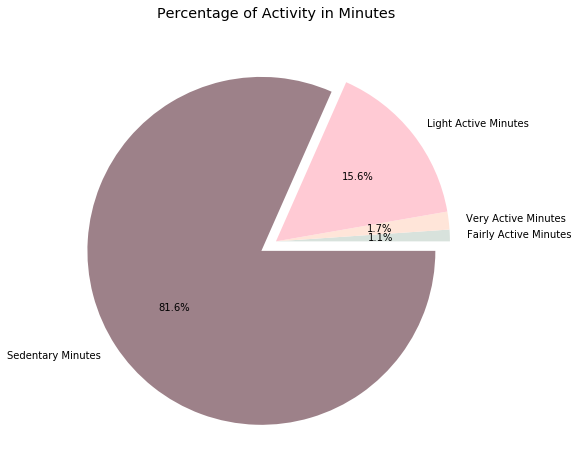

In [46]:
Merged_df['TotalMinutes'] = Merged_df['LightlyActiveMinutes'] + Merged_df['FairlyActiveMinutes'] + Merged_df['VeryActiveMinutes'] + Merged_df['SedentaryMinutes']

activitiesm = Merged_df['TotalMinutes'].mean()
lightlym_pcr = (Merged_df['LightlyActiveMinutes'].mean()/activitiesm) * 100
fairlym_pcr = (Merged_df['FairlyActiveMinutes'].mean()/activitiesm) * 100
verym_pcr = (Merged_df['VeryActiveMinutes'].mean()/activitiesm) * 100
sedentarym_pcr = (Merged_df['SedentaryMinutes'].mean()/activitiesm) * 100

 #plotting
plt.figure(figsize=(10,8))
plt.pie([fairlym_pcr, verym_pcr,lightlym_pcr,sedentarym_pcr], 
        labels = [ "Fairly Active Minutes", "Very Active Minutes", "Light Active Minutes", "Sedentary Minutes"], 
        colors = ['#d8e2dc', '#ffe5d9', '#ffcad4', '#9d8189'], 
        # wedgeprops = {"edgecolor": "black"}, 
        explode = [0, 0, 0, 0.1], 
        autopct = "%1.1f%%")

plt.title("Percentage of Activity in Minutes")
plt.show()

In [47]:
# Creating dataframe 'Person_weightLogInfo' group by 'Id'
Person_weightLogInfo = weightLogInfo.groupby('Id')
Person_weightLogInfo

In [79]:
summary_weightLogInfo = Person_weightLogInfo.mean()

In [80]:
summary_weightLogInfo

,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Id,,,,,,
1503960366,52.599998,115.963147,22.0,22.650000,True,1.462277e+12
1927972279,133.500000,294.317120,NaN,47.540001,False,1.460510e+12
2873212765,57.000000,125.663489,NaN,21.570001,True,1.462190e+12
4319703577,72.350002,159.504452,25.0,27.415000,True,1.461672e+12
4558609924,69.639999,153.529918,NaN,27.214000,True,1.461974e+12
5577150313,90.699997,199.959265,NaN,28.000000,False,1.460885e+12
6962181067,61.553334,135.701872,NaN,24.028000,True,1.461804e+12
8877689391,85.145834,187.714432,NaN,25.487083,False,1.461709e+12


In [81]:
summary_weightLogInfo = summary_weightLogInfo.drop('Fat',axis=1)
summary_weightLogInfo = summary_weightLogInfo.drop('LogId',axis=1)

In [82]:
# summary_weightLogInfo has only 8 persons data 
# combining all the data together by merging summary_weightLogInfo and Merge_df into Merged_df2
Merged_df2 = pd.merge(Merged_df,summary_weightLogInfo, on=['Id'], how ='right')
Merged_df2

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutes,WeightKg,WeightPounds,BMI,IsManualReport
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0000,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,...,848.161290,1816.419355,1.080000,360.280000,383.200000,1125.967742,52.599998,115.963147,22.650000,True
1927972279,916.129032,0.634516,0.634516,0.0000,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,...,1317.419355,2172.806452,1.600000,417.000000,437.800000,1358.096774,133.500000,294.317120,47.540001,False
2873212765,7555.774194,5.101613,5.101613,0.0000,0.676129,0.276129,4.143548,0.005161,14.096774,6.129032,...,1097.193548,1916.967742,NaN,NaN,NaN,1425.419355,57.000000,125.663489,21.570001,True
4319703577,7268.838710,4.892258,4.892258,0.0000,0.278065,0.502258,3.768710,0.000000,3.580645,12.322581,...,735.806452,2037.677419,1.038462,476.653846,501.961538,980.483871,72.350002,159.504452,27.415000,True
4558609924,7685.129032,5.080645,5.080645,0.0000,0.549355,0.682258,3.847742,0.000000,10.387097,13.709677,...,1093.612903,2033.258065,1.000000,127.600000,140.000000,1402.677419,69.639999,153.529918,27.214000,True
5577150313,8304.433333,6.213333,6.213333,0.0000,3.113667,0.658000,2.428000,0.000000,87.333333,29.833333,...,754.433333,3359.633333,1.038462,432.000000,460.615385,1019.533333,90.699997,199.959265,28.000000,False
6962181067,9794.806452,6.585806,6.519355,0.3237,1.616452,0.960000,4.001613,0.006774,22.806452,18.516129,...,662.322581,1982.032258,1.096774,448.000000,466.129032,949.451613,61.553334,135.701872,24.028000,True
8877689391,16040.032258,13.212903,13.212903,0.0000,6.637419,0.337742,6.188710,0.005161,66.064516,9.935484,...,1112.870968,3420.258065,NaN,NaN,NaN,1423.580645,85.145834,187.714432,25.487083,False


In [72]:
Merged_df2.corr()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutes,WeightKg,WeightPounds,BMI,IsManualReport,LogId
TotalSteps,1.000000,0.979687,0.979288,0.100963,0.841148,0.430305,0.906337,0.431542,0.591444,0.374312,...,0.395790,-0.820020,-0.084200,-0.078729,-0.030366,-0.566938,-0.566938,-0.735996,0.055333,0.580056
TotalDistance,0.979687,1.000000,0.999978,0.045194,0.912415,0.288852,0.880000,0.450792,0.644566,0.302947,...,0.540834,-0.843746,-0.045997,-0.038788,0.054074,-0.413650,-0.413650,-0.628601,-0.116361,0.445588
TrackerDistance,0.979288,0.999978,1.000000,0.038543,0.913111,0.285121,0.879629,0.446744,0.645411,0.301603,...,0.542466,-0.845152,-0.049116,-0.041657,0.057404,-0.412085,-0.412085,-0.627482,-0.118345,0.444946
LoggedActivitiesDistance,0.100963,0.045194,0.038543,1.000000,-0.066243,0.571998,0.092450,0.626398,-0.099708,0.214367,...,-0.222366,-0.098288,0.271778,0.250909,-0.497541,-0.252160,-0.252160,-0.194278,0.292770,0.115018
VeryActiveDistance,0.841148,0.912415,0.913111,-0.066243,1.000000,0.090750,0.619396,0.322049,0.808144,0.293845,...,0.759191,-0.424257,0.157067,0.172333,0.108293,-0.060325,-0.060325,-0.324473,-0.489477,0.087984
ModeratelyActiveDistance,0.430305,0.288852,0.285121,0.571998,0.090750,1.000000,0.320982,0.095382,0.235770,0.778315,...,-0.155927,-0.817958,-0.134366,-0.135839,-0.648911,-0.668208,-0.668208,-0.620142,0.512496,0.456885
LightActiveDistance,0.906337,0.880000,0.879629,0.092450,0.619396,0.320982,1.000000,0.540104,0.276940,0.117722,...,0.178264,-0.868173,-0.235149,-0.236737,0.121392,-0.685284,-0.685284,-0.803495,0.299888,0.759870
SedentaryActiveDistance,0.431542,0.450792,0.446744,0.626398,0.322049,0.095382,0.540104,1.000000,0.070330,-0.147948,...,0.067576,-0.098288,0.271778,0.250909,0.098627,-0.329419,-0.329419,-0.422497,0.115350,0.347736
VeryActiveMinutes,0.591444,0.644566,0.645411,-0.099708,0.808144,0.235770,0.276940,0.070330,1.000000,0.681363,...,0.842245,-0.373433,0.173318,0.192744,-0.160487,-0.010616,-0.010616,-0.296651,-0.555994,-0.147884
FairlyActiveMinutes,0.374312,0.302947,0.301603,0.214367,0.293845,0.778315,0.117722,-0.147948,0.681363,1.000000,...,0.333019,-0.737997,0.078663,0.093709,-0.667748,-0.364070,-0.364070,-0.471907,0.026385,0.057814


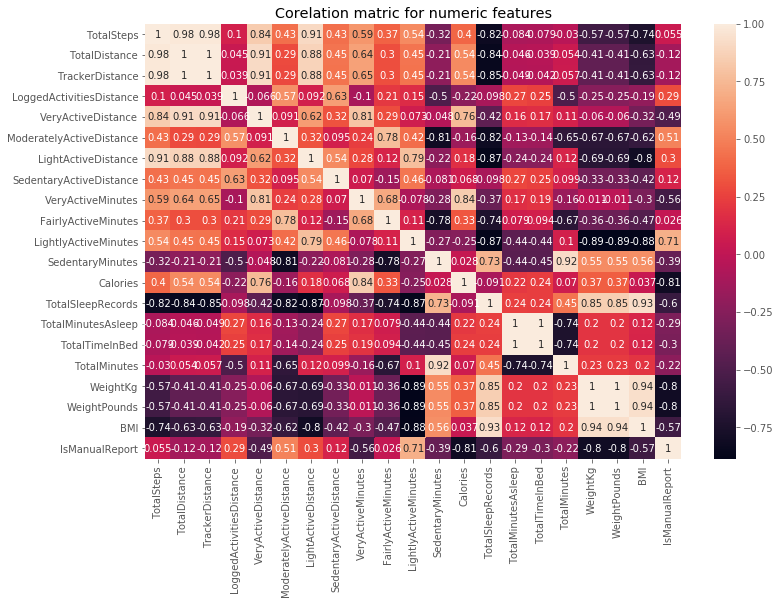

In [83]:
corelation_metrix1 = Merged_df2.corr() # bydefault(method ='pearson')
sns.heatmap(corelation_metrix1, annot=True)
plt.title('Corelation matric for numeric features')
plt.show()

In [84]:
corr_pairs = corelation_metrix1.unstack()
corr_pairs

TotalSteps      TotalSteps                  1.000000
                TotalDistance               0.979687
                TrackerDistance             0.979288
                LoggedActivitiesDistance    0.100963
                VeryActiveDistance          0.841148
                                              ...   
IsManualReport  TotalMinutes               -0.220245
                WeightKg                   -0.804321
                WeightPounds               -0.804321
                BMI                        -0.571857
                IsManualReport              1.000000
Length: 441, dtype: float64

In [85]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

LightlyActiveMinutes  WeightPounds           -0.886083
WeightPounds          LightlyActiveMinutes   -0.886083
LightlyActiveMinutes  WeightKg               -0.886083
WeightKg              LightlyActiveMinutes   -0.886083
BMI                   LightlyActiveMinutes   -0.877738
                                                ...   
WeightKg              WeightKg                1.000000
SedentaryMinutes      SedentaryMinutes        1.000000
IsManualReport        IsManualReport          1.000000
WeightKg              WeightPounds            1.000000
WeightPounds          WeightKg                1.000000
Length: 441, dtype: float64

In [86]:
high_corr = sorted_pairs[(sorted_pairs)>0.8]
high_corr

VeryActiveMinutes         VeryActiveDistance          0.808144
VeryActiveDistance        VeryActiveMinutes           0.808144
TotalSteps                VeryActiveDistance          0.841148
VeryActiveDistance        TotalSteps                  0.841148
Calories                  VeryActiveMinutes           0.842245
VeryActiveMinutes         Calories                    0.842245
WeightPounds              TotalSleepRecords           0.854232
TotalSleepRecords         WeightPounds                0.854232
WeightKg                  TotalSleepRecords           0.854232
TotalSleepRecords         WeightKg                    0.854232
TrackerDistance           LightActiveDistance         0.879629
LightActiveDistance       TrackerDistance             0.879629
TotalDistance             LightActiveDistance         0.880000
LightActiveDistance       TotalDistance               0.880000
TotalSteps                LightActiveDistance         0.906337
LightActiveDistance       TotalSteps                  0